In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [5]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')

In [6]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values

In [8]:
training_set.shape


(1258, 1)

In [9]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [10]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
 X_train.append(training_set_scaled[i-60: i, 0])
 y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [11]:
X_train.shape

(1198, 60)

In [12]:
y_train.shape


(1198,)

In [14]:
X_train= np.reshape(X_train, newshape =
 (X_train.shape[0], X_train.shape[1], 1))

In [15]:
X_train.shape


(1198, 60, 1)

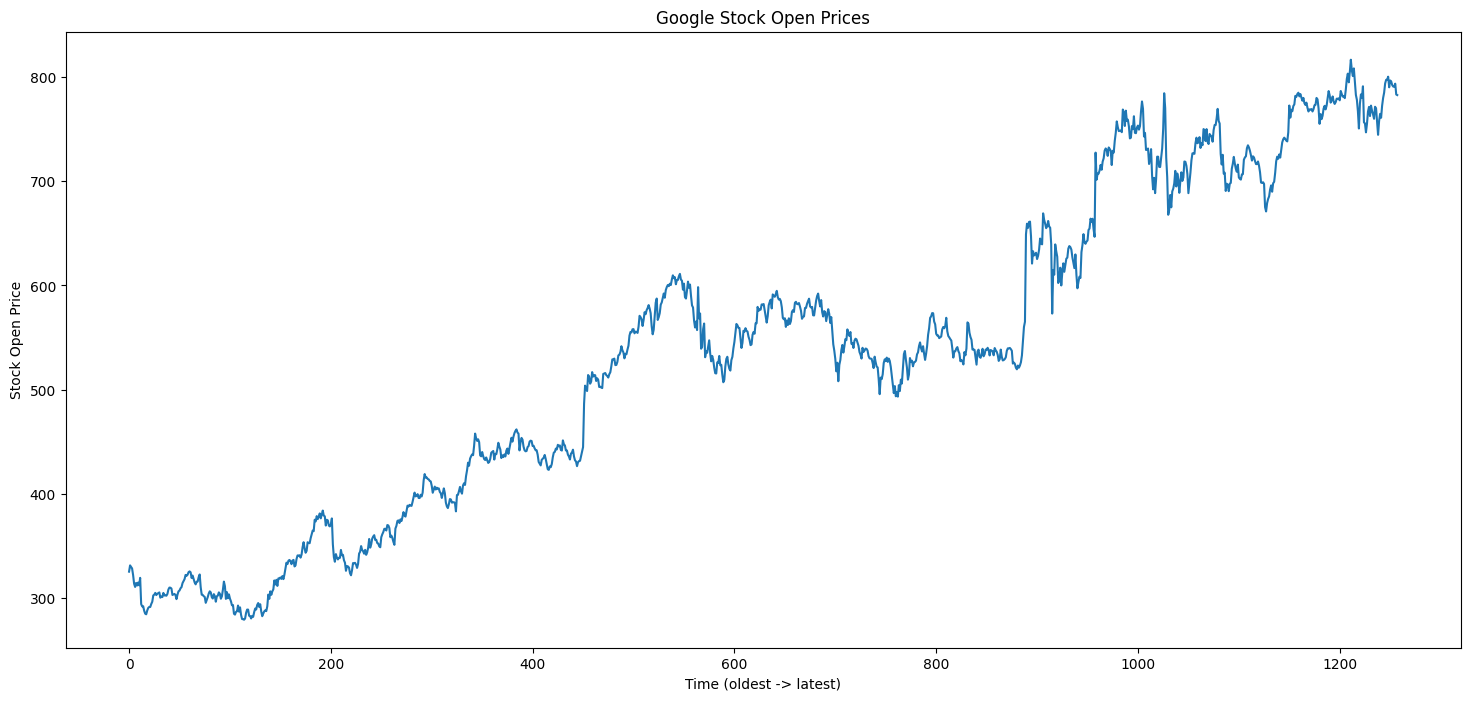

In [16]:

plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()


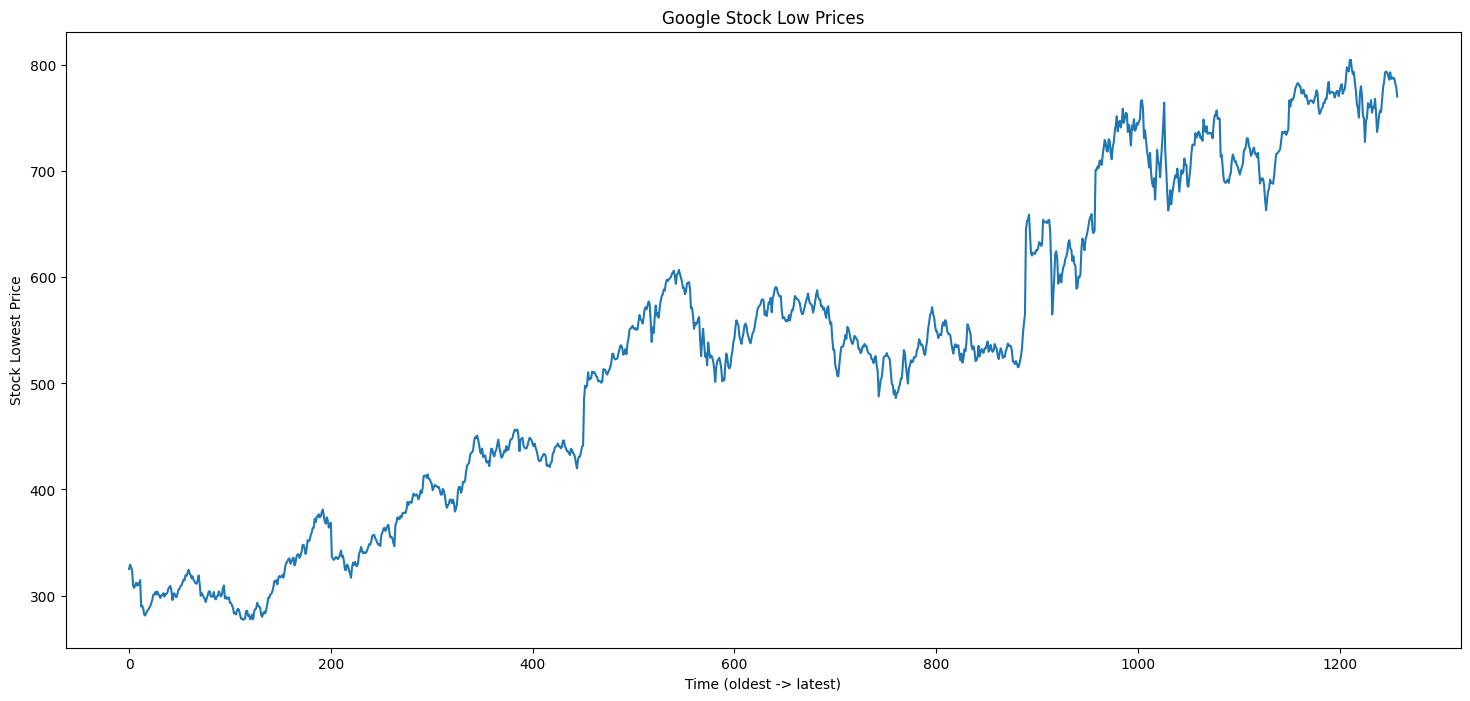

In [17]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Low'])
plt.title("Google Stock Low Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Price")
plt.show()

In [18]:

regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))
##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))
##add output layer
regressor.add(Dense(units = 1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - loss: 0.0950
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0076
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.0067
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.0053
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0052
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0050
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0061
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.0041
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0045
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - loss: 0.0046
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 0.0051
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0043
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - loss: 0.0040
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0049
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 10

In [23]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Train.csv')

In [24]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [25]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape


(1258, 1)

In [26]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),
 axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


In [27]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)
#scale input
inputs = sc.transform(inputs)


In [28]:
len(inputs)


1318

In [29]:
X_test = []
for i in range(60, len(inputs)):
 X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [30]:
X_test.shape


(1258, 60, 1)

In [31]:
predicted_stock_price = regressor.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


In [32]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


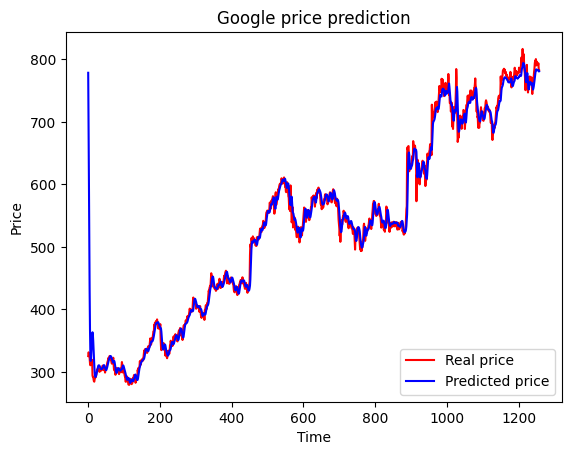

In [33]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()